## NetworkX tutorial

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([
    (2, {"color": "red"}),
    (3, {"color": "green"}),
    ("AB", {"color": "blue"}),
])

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [6]:
G.add_node(H)

^^^  
Cały graf **H** może występować w roli wierzchołka grafu **G**

In [7]:
G.add_edge(1, 2)

In [8]:
edg = (2, 3)
G.add_edge(*edg)

In [9]:
G.add_edges_from([
    (1, 2, {'weight': 3.1415}), 
    (1, 3, {'weight': 2.2423}),
])

In [10]:
G.add_edges_from(H.edges)

In [11]:
list(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [12]:
G.clear()

In [13]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [14]:
G.number_of_nodes(), G.number_of_edges()

(8, 3)

In [15]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [16]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [17]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [18]:
list(G.adj)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [19]:
list(G.degree)

[(1, 2), (2, 1), (3, 2), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 1)]

In [20]:
G.degree[1]

2

In [21]:
list(G.degree([1, 2]))

[(1, 2), (2, 1)]

In [22]:
list(G.edges([2, 'm']))

[(2, 1), ('m', 3)]

In [23]:
list(G.neighbors(1))

[2, 3]

In [24]:
list(G.neighbors(1)) == list(G.adj[1])

True

In [25]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [26]:
G.remove_edge(1, 3)    # G.remove_edges_from([...]) works as well

^^^  
Poprzednie komórki **zwrócą błąd**, jeśli nie ma już takiej krawędzi/wierzchołka 

In [28]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [30]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

Ale niestety coś takiego już **nie działa**, zwraca błąd:
```python
nodelist = [0, 1, 2, 3, 4, 5]
H = nx.Graph(nodelist)
```

In [52]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [53]:
G[1][2]

{'color': 'yellow'}

In [54]:
G.edges[1, 2]

{'color': 'yellow'}

In [55]:
# Works ONLY if the edge already exists
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G[1][3]
G.edges[1, 3]['color'] = "red"
G.edges[1, 3]

{'color': 'red'}

In [58]:
FG = nx.Graph()

FG.add_weighted_edges_from([
    (1, 2, 0.125), 
    (1, 3, 0.75), 
    (2, 4, 1.2), 
    (3, 4, 0.375),
])

for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: 
            print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [59]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [60]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [61]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [62]:
G.nodes[1]['room'] = 714
G.nodes.data()


NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [63]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [64]:
DG.degree(1, weight='weight')

1.25

In [65]:
list(DG.successors(1))

[2]

In [67]:
list(DG.predecessors(1))

[3]

In [68]:
list(DG.neighbors(1))

[2]

In [69]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

In [71]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [72]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [73]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [77]:
dict(nx.all_pairs_shortest_path(G))

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'spam': {'spam': ['spam']}}

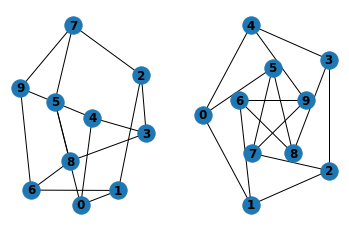

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2)    # 1 row 2 columns
G = nx.petersen_graph()
nx.draw(G, with_labels=True, 
        font_weight='bold', 
        ax=ax1
       )
nx.draw_shell(
    G, nlist=[range(5, 10), range(5)], 
    with_labels=True, 
    font_weight='bold', 
    ax=ax2
)

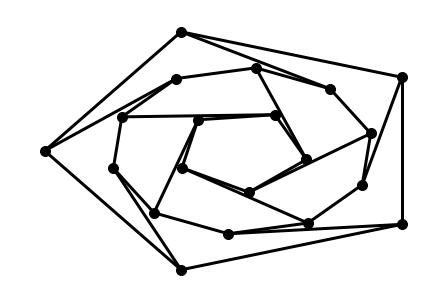

In [98]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)